## **Import the required libraries**

In [1]:
# import time
import time
t1 = time.time()

In [2]:
import math
import json
import pandas as pd
import numpy as np
np.random.seed(6)
import cv2
from sklearn.preprocessing import MinMaxScaler
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# **1. Load and Inspect the data**

In [3]:
data = pd.read_json('../input/train.json')
test_data = pd.read_json('../input/test.json')

In [4]:
data.head(5)

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [5]:
test_data.head(5)

,band_1,band_2,id,inc_angle
0,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",5941774d,34.966400
1,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",4023181e,32.615072
2,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",b20200e4,37.505433
3,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",e7f018bb,34.473900
4,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",4371c8c3,43.918874


In [6]:
print("Shape of train set:", data.shape)
print("Shape of test set:", test_data.shape)

Shape of train set: (1604, 5)
Shape of test set: (8424, 4)


In [7]:
print("Shape of band 1:",  np.shape(data.band_1.iloc[0]))
print("Shape of band 2:",  np.shape(data.band_2.iloc[0]))

Shape of band 1: (5625,)
Shape of band 2: (5625,)


In [8]:
print("Type of band 1:",  type(data.band_1.iloc[0]))
print("Type of band 2:",  type(data.band_2.iloc[0]))

Type of band 1: <class 'list'>
Type of band 2: <class 'list'>


# **2. Feature Engineering**

## **2.1 Feature engineering on train set**

### **2.1.1 Replacing the na in inc_anlge with mean**********

In [9]:
data[data['inc_angle']=='na'] = data[data['inc_angle']!='na']['inc_angle'].mean()

### **2.1.2 Converting the angle from degrees to radian******

In [10]:
data['inc_angle'] = data['inc_angle'].apply(lambda x: math.radians(x))

In [11]:
data.inc_angle.head()

0    0.766617
1    0.665951
2    0.790388
3    0.764988
4    0.621784
Name: inc_angle, dtype: float64

### ** 2.1.3 Finding and droping points with mismatch band1 and band2 data**

**Function which return the count and the index of mismatched data**

In [12]:
def find_missing_data(series, shape):
    
    '''function which return the count and the index of mismatched data'''    
    count = 0
    missing_list = []
    for i,x in enumerate(series):   
        if np.shape(series.iloc[i]) != shape:
            missing_list.append(i)
            count += 1
            
    return missing_list, count

**Count and list of mismatched points in band1**

In [13]:
missing_list1, count1 = find_missing_data(data.band_1, (5625,))
print("count: ", count1)
print("missing data: ", missing_list1)

count:  133
missing data:  [101, 126, 142, 145, 176, 179, 191, 278, 286, 342, 412, 431, 440, 493, 642, 666, 667, 730, 741, 742, 763, 822, 863, 868, 906, 916, 996, 1041, 1065, 1095, 1199, 1228, 1247, 1257, 1268, 1290, 1345, 1403, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603]


**Count and list of mismatched points in band2**

In [14]:
missing_list2, count2 = find_missing_data(data.band_2, (5625,))
print("count: ", count1)
print("missing data: ", missing_list2)

count:  133
missing data:  [101, 126, 142, 145, 176, 179, 191, 278, 286, 342, 412, 431, 440, 493, 642, 666, 667, 730, 741, 742, 763, 822, 863, 868, 906, 916, 996, 1041, 1065, 1095, 1199, 1228, 1247, 1257, 1268, 1290, 1345, 1403, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603]


**Check if the missing points are same**

In [15]:
missing_list1 == missing_list2

True

**Function to drop data by index**

In [16]:
def drop_data(df, index):
    
    '''function to drop data by index'''
    return df.drop(df.index[index])

**Drop the points with mismatched images**

In [17]:
data = drop_data(data, missing_list1)

In [18]:
data.shape

(1471, 5)

In [19]:
print("Number of positive classes: ", len(data[data['is_iceberg'] == 1.0]))
print("Number of negative classes: ", len(data[data['is_iceberg'] == 0.0]))

Number of positive classes:  753
Number of negative classes:  718


### 2.1.4 Scale the image data

**3 standardization to technique we can try on**

In [20]:
def standardise_vector(vector):
    '''standardise vector'''
    standardised_vector = (np.array(vector) - np.mean(vector)) / np.std(vector)
    return standardised_vector.tolist()

In [21]:
def mean_normalise_vector(vector):
    '''mean normalize vector'''
    normalised_vector = (np.array(vector) - np.mean(vector)) / (np.max(vector) - np.min(vector))
    return normalised_vector.tolist()

In [22]:
def min_max_scaler(vector, minimum = 0, maximum = 1):
    '''minmaxscaler'''
    X_std  = (np.array(vector) - np.min(vector)) / (np.max(vector) - np.min(vector))
    scaled_vector = X_std * (maximum - minimum) + minimum
    return scaled_vector.tolist()

**We will use standardisation as the  normalization technique since this works well with images**

In [23]:
data['band_1'] = data['band_1'].apply(standardise_vector)
data['band_2'] = data['band_2'].apply(standardise_vector)

In [24]:
data.head(5)

,band_1,band_2,id,inc_angle,is_iceberg
0,"[0.01182174564467684, 0.27378275943768166, -0....","[1.1573585860406173, 0.15631457838356574, -0.4...",dfd5f913,0.766617,0.0
1,"[0.42137323598577087, -0.43078366534450846, -0...","[-2.0950953014724543, -0.8948057535299927, -0....",e25388fd,0.665951,0.0
2,"[-0.6969623073924855, -0.6969793944501068, -0....","[-0.014649839717716016, 0.35157292381049343, 1...",58b2aaa0,0.790388,1.0
3,"[0.2946591706447792, 0.04985985071106006, -0.3...","[0.7023040788844376, 0.8569610477684707, 1.005...",4cfc3a18,0.764988,0.0
4,"[-0.31533024179271146, 0.9175181439939705, 0.9...","[-0.693769690678262, -2.0346940986353044, -2.0...",271f93f4,0.621784,0.0


### **2.1.5 Reshaping the band1 and band2 data into 2D image**

In [25]:
band_1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in data["band_1"]])
band_2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in data["band_2"]])

In [26]:
print("Shape of band 1 image:",band_1.shape)
print("Shape of band 2 image:",band_2.shape)

Shape of band 1 image: (1471, 75, 75)
Shape of band 2 image: (1471, 75, 75)


## **2.2 Feature engieering on test Set**

**We carry out the same feature engineering as carried out on train set**

In [27]:
test_data['inc_angle'] = test_data['inc_angle'].apply(lambda x: math.radians(x))

In [28]:
test_data.inc_angle.head()

0    0.610279
1    0.569240
2    0.654593
3    0.601683
4    0.766529
Name: inc_angle, dtype: float64

In [29]:
missing_list3, count3 = find_missing_data(test_data.band_1, (5625,))
print("count: ", count3)
print("missing data: ", missing_list3)

count:  0
missing data:  []


In [30]:
missing_list4, count4 = find_missing_data(test_data.band_2, (5625,))
print("count: ", count4)
print("missing data: ", missing_list4)

count:  0
missing data:  []


In [31]:
test_data['band_1'] = test_data['band_1'].apply(standardise_vector)
test_data['band_2'] = test_data['band_2'].apply(standardise_vector)

In [32]:
band_1_test = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_data["band_1"]])
band_2_test = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_data["band_2"]])

In [33]:
print("Shape of test set band 1 image:",band_1_test.shape)
print("Shape of test set band 2 image:",band_2_test.shape)

Shape of test set band 1 image: (8424, 75, 75)
Shape of test set band 2 image: (8424, 75, 75)


# **3. Train/test/validation split**

**Extract the labels and angles of train set**

In [34]:
labels = data.is_iceberg.as_matrix()
angles = data.inc_angle.as_matrix()

**Carry out splits**

In [35]:
# randomly choosing the train and validation indices
train_indices = np.random.choice(len(labels), round(len(labels)*0.75), replace=False)
validation_indices = np.array(list(set(range(len(labels))) - set(train_indices)))

# extract train set
band_1_train = band_1[train_indices]
band_2_train = band_2[train_indices]
angles_train = angles[train_indices]
labels_train = labels[train_indices]

# extract validation set
band_1_validation = band_1[validation_indices]
band_2_validation = band_2[validation_indices]
angles_validation = angles[validation_indices]
labels_validation = labels[validation_indices]

# extract test set
band_1_test = band_1_test
band_2_test = band_2_test
angles_test = test_data.inc_angle.as_matrix()
iD = test_data.id.as_matrix()

**Covert the types of all data to float**

In [36]:
band_1_train = band_1_train.astype(np.float32)
band_1_validation = band_1_validation.astype(np.float32)
band_1_test = band_1_test.astype(np.float32)
band_2_train = band_2_train.astype(np.float32)
band_2_validation = band_2_validation.astype(np.float32)
band_2_test = band_2_test.astype(np.float32)
angles_train = angles_train.astype(np.float32)
angles_validation = angles_validation.astype(np.float32)
angles_test = angles_test.astype(np.float32)
labels_train = labels_train.astype(np.float32)
labels_validation = labels_validation.astype(np.float32)
iD = iD.astype(np.str)

In [37]:
# delete the unnecessary variables out of memory
del(data, test_data, band_1, band_2)

**Examine the shape of the data**

In [38]:
print("Shape of band_1_train:",band_1_train.shape)
print("Shape of band_2_train:",band_1_train.shape)
print("Shape of angles_train:",angles_train.shape)
print("Shape of labels_train:",labels_train.shape)
print("Shape of band_1_validation:",band_1_validation.shape)
print("Shape of band_2_validation:",band_2_validation.shape)
print("Shape of angles_validation:",angles_validation.shape)
print("Shape of labels_validation:",labels_validation.shape)
print("Shape of band_1_test:",band_1_test.shape)
print("Shape of band_2_test:",band_2_test.shape)
print("Shape of angles_test:",angles_test.shape)
print("Shape of iD:",iD.shape)

Shape of band_1_train: (1103, 75, 75)
Shape of band_2_train: (1103, 75, 75)
Shape of angles_train: (1103,)
Shape of labels_train: (1103,)
Shape of band_1_validation: (368, 75, 75)
Shape of band_2_validation: (368, 75, 75)
Shape of angles_validation: (368,)
Shape of labels_validation: (368,)
Shape of band_1_test: (8424, 75, 75)
Shape of band_2_test: (8424, 75, 75)
Shape of angles_test: (8424,)
Shape of iD: (8424,)


# **4. Augmenting train set**

## **4.1 Functions to carry out different augmentation technique**

**4.1.1 Image Rotation**

In [39]:
def rotate_image(img, angle = 20):
    
    '''a function to rotate image by a given degree'''
    
    # rotate image
    original = img.copy()

    M_rotate = cv2.getRotationMatrix2D((37,37),angle,1)
    img_new = cv2.warpAffine(img,M_rotate,(75,75))
    
    length_row = 0
    length_column = 0
    boundary_step = 5
    
    for i in range(len(img_new)):
        if img_new[0,i]!=float(0.0):
            length_row = i
            break
    for i in range(len(img_new)):
        if img_new[i,0]!=float(0.0):
            length_column = i
            break
    
    # subsitute the padding from original image
    img_new[:length_column+boundary_step,:length_row+boundary_step] = \
    original[:length_column+boundary_step,:length_row+boundary_step] 
    img_new[-(length_row+boundary_step):,:length_column+boundary_step] = \
    original[-(length_row+boundary_step):,:length_column+boundary_step]
    img_new[:length_row+boundary_step,-(length_column+boundary_step):] = \
    original[:length_row+boundary_step,-(length_column+boundary_step):]
    img_new[-(length_column+boundary_step):,-(length_row+boundary_step):] = \
    original[-(length_column+boundary_step):,-(length_row+boundary_step):]
    
    return img_new

**4.1.2 Horizontal translation**

In [40]:
def translate_horizontal(image, shift_horizontal = 5):
    
    '''a function to translate image horizontally by a shift'''
    
    # horizontally shift image
    img = image.copy()
    
    shift_vertical = 0; 
    if shift_horizontal<0:
        image_slice = img[:,shift_horizontal:].copy()
    if shift_horizontal>0:
        image_slice = img[:,:shift_horizontal].copy()
    M_translate = np.float32([[1,0,shift_horizontal],[0,1,shift_vertical]])
    img_new = cv2.warpAffine(img,M_translate,(75,75))
    
    # subsitute the padding from original image
    if shift_horizontal<0:
        img_new[:,shift_horizontal:] = image_slice
    if shift_horizontal>0:
        img_new[:,:shift_horizontal] = image_slice
        
    return img_new.reshape(75,75).astype(np.float32)

**4.1.3 Vertical translation**

In [41]:
def translate_vertical(image, shift_vertical = 5):
    
    '''a function to translate image vertically by a shift'''
    
    # vertically shift image
    img = image.copy()
    
    shift_horizontal = 0;
    if shift_vertical<0:
        image_slice = img[shift_vertical:,:].copy()
    if shift_vertical>0:
        image_slice = img[:shift_vertical,:].copy()
    M_translate = np.float32([[1,0,shift_horizontal],[0,1,shift_vertical]])
    img_new = cv2.warpAffine(img,M_translate,(75,75))
    
    # subsitute the padding from original image
    if shift_vertical<0:
        img_new[shift_vertical:,:] = image_slice
    if shift_vertical>0:
        img_new[:shift_vertical,:] = image_slice
        
    return img_new.reshape(75,75).astype(np.float32)

**4.1.4 Translation along positive diagonal**

In [42]:
def translate_positive_diagonal(image, shift_diagonal = 5):
    
    '''a function to translate image along positive diagonal'''
    
    # translate image along positive diagonal
    img = image.copy()
    
    if shift_diagonal<0:
        hor_slice = img[shift_diagonal:,:].copy()
        ver_slice = img[:,shift_diagonal:].copy()
    else:
        hor_slice = img[:shift_diagonal,:].copy()
        ver_slice = img[:,:shift_diagonal].copy()
    M_translate = np.float32([[1,0,shift_diagonal],[0,1,shift_diagonal]])
    img_new = cv2.warpAffine(img,M_translate,(75,75))
    
    # subsitute the padding from original image
    if shift_diagonal<0:
        img_new[shift_diagonal:,:] = hor_slice
        img_new[:,shift_diagonal:] = ver_slice
    else:
        img_new[:shift_diagonal,:] = hor_slice
        img_new[:,:shift_diagonal] = ver_slice
    
    return img_new.reshape(75,75).astype(np.float32)

**4.1.5 Translation along negative diagonal**

In [43]:
def translate_negative_diagonal(image, shift_diagonal = 5):
    
    '''a function to translate image along negative diagonal'''
    
    # translate image along negative diagonal
    img = image.copy()
    
    if shift_diagonal<0:
        hor_slice = img[:-shift_diagonal,:].copy()
        ver_slice = img[:,shift_diagonal:].copy()
    if shift_diagonal>0:
        hor_slice = img[-shift_diagonal:,:].copy()
        ver_slice = img[:,:shift_diagonal].copy()
    M_translate = np.float32([[1,0,shift_diagonal],[0,1,-shift_diagonal]])
    img_new = cv2.warpAffine(img,M_translate,(75,75))
    
    # subsitute the padding from original image
    if shift_diagonal<0:
        img_new[:-shift_diagonal,:] = hor_slice
        img_new[:,shift_diagonal:] = ver_slice
    if shift_diagonal>0:
        img_new[-shift_diagonal:,:] = hor_slice
        img_new[:,:shift_diagonal] = ver_slice
        
    return img_new.reshape(75,75).astype(np.float32)

**4.1.6 Flip Image**

In [44]:
def flip(image, direction = 0):
    
    '''a function to flip image'''
    img = image.copy()
    return cv2.flip(img,direction)

**4.1.7 Zoom image**

In [45]:
def zoom(image, zoom_shift = 5):
    
    '''a function to zoom image'''
    
    # zoom image
    img = image.copy()
    
    # zoom in 
    if zoom_shift>0:
        # scale
        img_new = cv2.resize(img, (75+zoom_shift*2,75+zoom_shift*2)) 
        # crop
        img_new = img_new[zoom_shift:-zoom_shift,zoom_shift:-zoom_shift] 
    # zoom out
    else:
        zoom_shift *=-1
        
        hor_top = img[:zoom_shift,:]
        hor_bottom =img[-zoom_shift:,:]
        ver_left = img[:,:zoom_shift]
        ver_right = img[:,-zoom_shift:]
        
        # scale
        img_new = cv2.resize(img, (75-zoom_shift*2,75-zoom_shift*2)) 
        # zero padding
        img_new = cv2.copyMakeBorder(img_new,zoom_shift,zoom_shift,zoom_shift,zoom_shift,
                                     cv2.BORDER_CONSTANT,value=0.0)
        # subsitute the padding from original image
        img_new[:zoom_shift,:] = hor_top
        img_new[-zoom_shift:,:] = hor_bottom
        img_new[:,:zoom_shift] = ver_left
        img_new[:,-zoom_shift:] = ver_right     
        
    return img_new.reshape(75,75).astype(np.float32)

## **4.2 Displaying augmented samples**

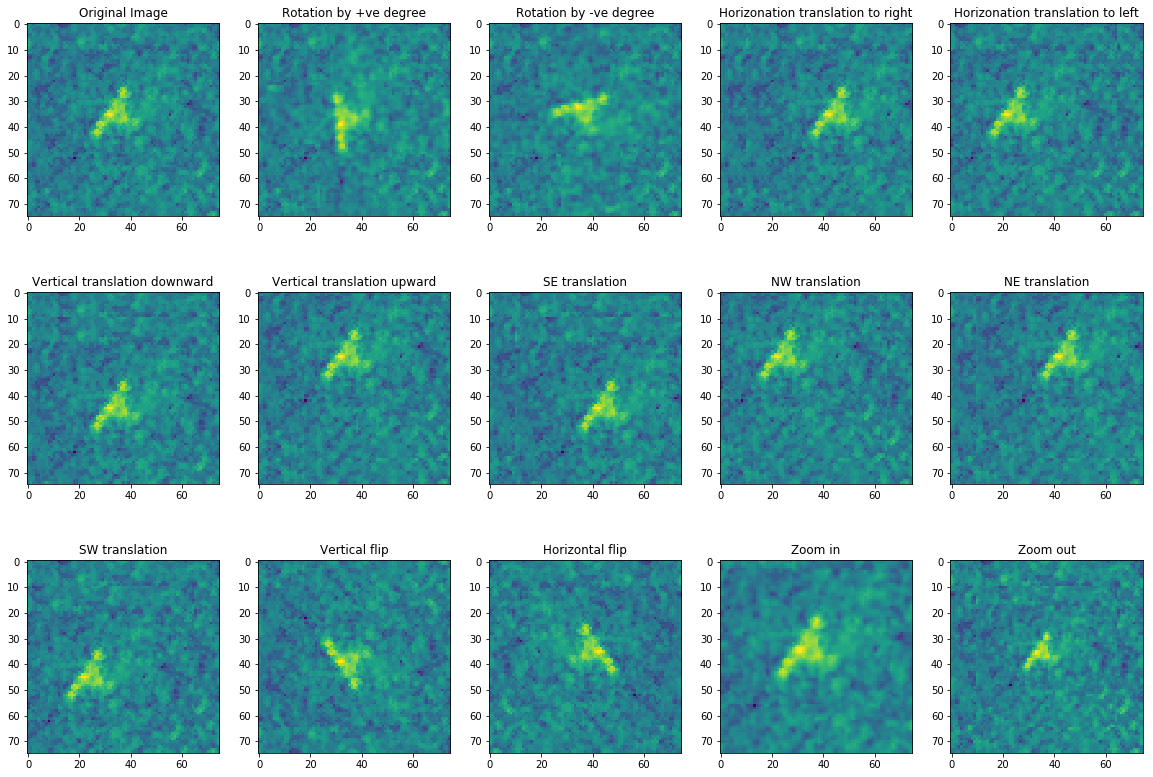

In [46]:
matplotlib.rcParams['figure.figsize'] = (20.0, 14.0)
image = band_1_test[3].copy()
plt.subplot(3, 5, 1)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(3, 5, 2)
generated_image = rotate_image(image,40)
plt.title("Rotation by +ve degree")
plt.imshow(generated_image)
plt.subplot(3, 5, 3)
generated_image = rotate_image(image,-40)
plt.title("Rotation by -ve degree")
plt.imshow(generated_image)
plt.subplot(3, 5, 4)
generated_image = translate_horizontal(image,10)
plt.title("Horizonation translation to right")
plt.imshow(generated_image)
plt.subplot(3, 5, 5)
generated_image = translate_horizontal(image,-10)
plt.title("Horizonation translation to left")
plt.imshow(generated_image)
plt.subplot(3, 5, 6)
generated_image = translate_vertical(image,10)
plt.title("Vertical translation downward")
plt.imshow(generated_image)
plt.subplot(3, 5, 7)
generated_image = translate_vertical(image,-10)
plt.title("Vertical translation upward")
plt.imshow(generated_image)
plt.subplot(3, 5, 8)
generated_image = translate_positive_diagonal(image,10)
plt.title("SE translation")
plt.imshow(generated_image)
plt.subplot(3, 5, 9)
generated_image = translate_positive_diagonal(image,-10)
plt.title("NW translation")
plt.imshow(generated_image)
plt.subplot(3, 5, 10)
generated_image = translate_negative_diagonal(image,10)
plt.title("NE translation")
plt.imshow(generated_image)
plt.subplot(3, 5, 11)
generated_image = translate_negative_diagonal(image,-10)
plt.title("SW translation")
plt.imshow(generated_image)
plt.subplot(3, 5, 12)
generated_image = flip(image,0)
plt.title("Vertical flip")
plt.imshow(generated_image)
plt.subplot(3, 5, 13)
generated_image = flip(image,1)
plt.title("Horizontal flip")
plt.imshow(generated_image)
plt.subplot(3, 5, 14)
generated_image = zoom(image,10)
plt.title("Zoom in")
plt.imshow(generated_image)
plt.subplot(3, 5, 15)
generated_image = zoom(image,-10)
plt.title("Zoom out")
plt.imshow(generated_image)
plt.show()

## **4.3 Augmentation of train set**

In [47]:
def augment_data(band1, band2, angles, labels):
    
    '''a function to augment band1 and band2 image'''
    
    # list to store the generated data
    band1_generated = []
    band2_generated = []
    angles_generated = []
    labels_generated = []
    
    # iterate through each point in train set
    for i in range(labels.shape[0]):
        
        # rotate by positive degree
        angle = np.random.randint(5,20)
        band1_generated.append(rotate_image(band1[i],angle)) 
        band2_generated.append(rotate_image(band2[i],angle))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # rotate by negative degree
        angle = np.random.randint(5,20)
        band1_generated.append(rotate_image(band1[i],-angle)) 
        band2_generated.append(rotate_image(band2[i],-angle))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # positive horizontal shift
        shift = np.random.randint(3,7)
        band1_generated.append(translate_horizontal(band1[i],+shift)) 
        band2_generated.append(translate_horizontal(band2[i],+shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # negative horizontal shift
        shift = np.random.randint(3,7) 
        band1_generated.append(translate_horizontal(band1[i],-shift)) 
        band2_generated.append(translate_horizontal(band2[i],-shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # positive vertical shift
        shift = np.random.randint(0,7)  
        band1_generated.append(translate_vertical(band1[i],+shift)) 
        band2_generated.append(translate_vertical(band2[i],+shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # negative vertical shift
        shift = np.random.randint(3,7) 
        band1_generated.append(translate_vertical(band1[i],-shift)) 
        band2_generated.append(translate_vertical(band2[i],-shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # translate along positive diagonal in positive direction
        shift = np.random.randint(3,7)  
        band1_generated.append(translate_positive_diagonal(band1[i],+shift)) 
        band2_generated.append(translate_positive_diagonal(band2[i],+shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # translate along positive diagonal in negative direction
        shift = np.random.randint(3,7)  
        band1_generated.append(translate_positive_diagonal(band1[i],-shift)) 
        band2_generated.append(translate_positive_diagonal(band2[i],-shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # translate along negative diagonal in positive direction
        shift = np.random.randint(3,7)   
        band1_generated.append(translate_negative_diagonal(band1[i],+shift)) 
        band2_generated.append(translate_negative_diagonal(band2[i],+shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # translate along negative diagonal in negative direction
        shift = np.random.randint(3,7)   
        band1_generated.append(translate_negative_diagonal(band1[i],-shift)) 
        band2_generated.append(translate_negative_diagonal(band2[i],-shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # vertical flip
        band1_generated.append(flip(band1[i],0)) 
        band2_generated.append(flip(band2[i],0))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # horizontal flip
        band1_generated.append(flip(band1[i],1)) 
        band2_generated.append(flip(band2[i],1))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # zoom in image
        zoom_shift = np.random.randint(2,5)
        band1_generated.append(zoom(band1[i],zoom_shift)) 
        band2_generated.append(zoom(band2[i],zoom_shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])
        
        # zoom out image
        zoom_shift = np.random.randint(2,5) 
        band1_generated.append(zoom(band1[i],-zoom_shift)) 
        band2_generated.append(zoom(band2[i],-zoom_shift))
        angles_generated.append(angles[i])
        labels_generated.append(labels[i])        
        
    # convert the generated data into numpy array
    band1_generated = np.array(band1_generated)
    band2_generated = np.array(band2_generated)
    angles_generated = np.array(angles_generated)
    labels_generated = np.array(labels_generated)
    
    # concatenate the generated data to original train set
    band1_augmented = np.concatenate((band1, band1_generated),axis=0)
    band2_augmented = np.concatenate((band2, band2_generated),axis=0)
    angles_augmented = np.concatenate((angles, angles_generated),axis=0)
    labels_augmented = np.concatenate((labels, labels_generated),axis=0)
    
    return band1_augmented, band2_augmented, angles_augmented, labels_augmented

In [48]:
# augment train set
band_1_train, band_2_train, angles_train, labels_train = \
    augment_data(band_1_train, band_2_train, angles_train, labels_train)

**Examine the shape of augmented data**

In [49]:
print("Shape of band_1_train:",band_1_train.shape)
print("Shape of band_2_train:",band_2_train.shape)
print("Shape of angles_train:",angles_train.shape)
print("Shape of labels_train:",labels_train.shape)

Shape of band_1_train: (16545, 75, 75)
Shape of band_2_train: (16545, 75, 75)
Shape of angles_train: (16545,)
Shape of labels_train: (16545,)


# **5. Concatenate the band1 and band2 data into 3D image**

**Here we stack band_1, band_2, and average of the two to create a 3D image**

In [50]:
image_train = np.concatenate([band_1_train[:, :, :, np.newaxis],
                             band_2_train[:, :, :, np.newaxis],
                             ((band_1_train+band_2_train)/2)[:, :, :, np.newaxis]],
                             axis=-1)

In [51]:
image_validation = np.concatenate([band_1_validation[:, :, :, np.newaxis],
                             band_2_validation[:, :, :, np.newaxis],
                             ((band_1_validation+band_2_validation)/2)[:, :, :, np.newaxis]],
                             axis=-1)

In [52]:
image_test = np.concatenate([band_1_test[:, :, :, np.newaxis],
                             band_2_test[:, :, :, np.newaxis],
                             ((band_1_test+band_2_test)/2)[:, :, :, np.newaxis]],
                             axis=-1)

In [53]:
# delete the unnecessary variables out of memory
del(band_1_train, band_1_validation, band_1_test, band_2_train, band_2_validation, band_2_test)

**Examine the shape of 3D images**

In [54]:
print("Shape of image_train:",image_train.shape)
print("Shape of image_validation:",image_validation.shape)
print("Shape of image_test:",image_test.shape)

Shape of image_train: (16545, 75, 75, 3)
Shape of image_validation: (368, 75, 75, 3)
Shape of image_test: (8424, 75, 75, 3)


# **6. Creating Convolutional Neural Network**

**Import tensorflow and reset default graph**

In [55]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
# sess = tf.InteractiveSession()

## **6.1 One hot encoding labels**

In [56]:
labels_train = pd.get_dummies(labels_train).as_matrix()
labels_validation = pd.get_dummies(labels_validation).as_matrix()

In [57]:
print("Shape of labels_train:", labels_train.shape)
print("Shape of labels_validation:", labels_validation.shape)

Shape of labels_train: (16545, 2)
Shape of labels_validation: (368, 2)


## **6.2 Create placeholders**

In [58]:
# image dimensions
width = 75
height = 75
num_channels = 3
flat = width * height
num_classes = 2

**Create placeholder for image, labels,  dropout keep probability, and optionally angle**

In [59]:
image = tf.placeholder(tf.float32, shape=[None, height, width, num_channels])
# angle = tf.placeholder(tf.float32, shape= [None, 1])
y_true = tf.placeholder(tf.int32, shape=[None, num_classes])
keep_prob = tf.placeholder(tf.float32)

## **6.3 Create functions for creating deep learning layers**

In [60]:
def create_weights(shape):
    '''a function to create weight tensor'''
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
 
def create_biases(size):
    '''a function to create bias tensor'''
    return tf.Variable(tf.constant(0.05, shape=[size]))

In [61]:
def create_convolutional_layer(input,
                               num_input_channels,
                               conv_filter_size,
                               max_pool_filter_size,
                               num_filters):  
    
    '''a function to create convoutional layer'''
    
    # create filter for the convolutional layer
    weights = create_weights(shape=[conv_filter_size, conv_filter_size, num_input_channels, num_filters])
    
    # create biases
    biases = create_biases(num_filters)
    
    # create covolutional layer
    layer = tf.nn.conv2d(input=input,
                     filter=weights,
                     strides=[1, 1, 1, 1],
                     padding='SAME')
    
    # add the bias to the convolutional layer
    layer += biases
    
    # relu activation layer fed into layer
    layer = tf.nn.relu(layer)
    
    # max pooling to half the size of the image
    layer = tf.nn.max_pool(value=layer,
                            ksize=[1, max_pool_filter_size, max_pool_filter_size, 1],
                            strides=[1, 2, 2, 1],
                            padding='SAME')
        
    # return the output layer of the convolution
    return layer

In [62]:
def create_flatten_layer(layer):
    
    '''a function for creating flattened layer from convolutional output'''
    
    # extract the shape of the layer
    layer_shape = layer.get_shape()
    # calculate the number features of the flattened layer
    num_features = layer_shape[1:4].num_elements()
    # create the flattened layer
    layer = tf.reshape(layer, [-1, num_features])
    # return the layer
    return layer

In [63]:
def create_fc_layer(input,          
                    num_inputs,    
                    num_outputs,
                    use_relu=True,
                    dropout = False, 
                    keep_prob = 0.2):
    
    '''a function for creating fully connected layer'''
    
    #Let's define trainable weights and biases.
    weights = create_weights(shape=[num_inputs, num_outputs])
    biases = create_biases(num_outputs)
    
    # matrix multiplication between input and weight matrix
    layer = tf.matmul(input, weights) + biases
    
    # add relu activation if wanted
    if use_relu:
        layer = tf.nn.relu(layer)
        
    # if dropout is wanted add dropout
    if dropout:        
        layer = tf.nn.dropout(layer, keep_prob)
    
    # return layer
    return layer

## **6.4 Create Layers of Covnet**

In [64]:
# paramters for 1st convolutional layer
conv1_features = 64
conv1_filter_size = 3
max_pool_size1 = 2

# paramters for 2nd convolutional layer
conv2_features = 128
conv2_filter_size = 3
max_pool_size2 = 2

# paramters for 3rd convolutional layer
conv3_features = 128
conv3_filter_size = 3
max_pool_size3 = 2

# paramters for 4th convolutional layer
conv4_features = 64
conv4_filter_size = 3
max_pool_size4 = 2

# number of featuers of 1st fully connected layer
fc_layer_size1 = 512

# number of featuers of 2nd fully connected layer
fc_layer_size2 = 256

**Create convolutional layer 1**

In [65]:
layer_conv1 = create_convolutional_layer(input=image,
                                         num_input_channels= num_channels,
                                         conv_filter_size = conv1_filter_size,
                                         max_pool_filter_size = max_pool_size1,
                                         num_filters = conv1_features)
layer_conv1

<tf.Tensor 'MaxPool:0' shape=(?, 38, 38, 64) dtype=float32>

**Create convolutional layer 2**

In [66]:
layer_conv2 = create_convolutional_layer(input=layer_conv1,
                                         num_input_channels= conv1_features,
                                         conv_filter_size = conv2_filter_size,
                                         max_pool_filter_size = max_pool_size2,
                                         num_filters = conv2_features)
layer_conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 19, 19, 128) dtype=float32>

**Create convolutional layer 3**

In [67]:
layer_conv3 = create_convolutional_layer(input=layer_conv2,
                                         num_input_channels= conv2_features,
                                         conv_filter_size = conv3_filter_size,
                                         max_pool_filter_size = max_pool_size3,
                                         num_filters = conv3_features)
layer_conv3

<tf.Tensor 'MaxPool_2:0' shape=(?, 10, 10, 128) dtype=float32>

**Create convolutional layer 4**

In [68]:
layer_conv4 = create_convolutional_layer(input=layer_conv3,
                                         num_input_channels= conv3_features,
                                         conv_filter_size = conv4_filter_size,
                                         max_pool_filter_size = max_pool_size4,
                                         num_filters = conv4_features)
layer_conv4

<tf.Tensor 'MaxPool_3:0' shape=(?, 5, 5, 64) dtype=float32>

**Flatten the output of last convolutional layer**

In [69]:
layer_flat = create_flatten_layer(layer_conv4)
layer_flat

<tf.Tensor 'Reshape:0' shape=(?, 1600) dtype=float32>

**Create a connected layer for angle and concat this with the fully connected layer (OPTIONAL)**

In [70]:
# layer_angle = create_fc_layer(input = angle,
#                               num_inputs=1,
#                               num_outputs=1,
#                               use_relu= True)

In [71]:
# combined_layer = tf.concat((layer_flat, layer_angle), axis=1)

In [72]:
# layer_fc1 = create_fc_layer(input=combined_layer,
#                             num_inputs=combined_layer.get_shape()[1:4].num_elements(),
#                             num_outputs=fc_layer_size1,
#                             use_relu=True,
#                             dropout =True,
#                             keep_prob = keep_prob)

**Create the first fully connected layer**

In [73]:
layer_fc1 = create_fc_layer(input=layer_flat,
                            num_inputs=layer_flat.get_shape()[1:4].num_elements(),
                            num_outputs=fc_layer_size1,
                            use_relu=True,
                            dropout =True,
                            keep_prob = keep_prob)
layer_fc1

<tf.Tensor 'dropout/mul:0' shape=(?, 512) dtype=float32>

**Create the second  fully connected layer**

In [74]:
layer_fc2 = create_fc_layer(input=layer_fc1,
                            num_inputs=fc_layer_size1,
                            num_outputs=fc_layer_size2,
                            use_relu=True,
                            dropout =True,
                            keep_prob = keep_prob)
layer_fc2

<tf.Tensor 'dropout_1/mul:0' shape=(?, 256) dtype=float32>

**Create the output layer**

In [75]:
output_layer = create_fc_layer(input=layer_fc2,
                     num_inputs = fc_layer_size2,
                     num_outputs = num_classes,
                     use_relu=False)
output_layer

<tf.Tensor 'add_6:0' shape=(?, 2) dtype=float32>

## **6.5 Create prediction & accuracy metric**

In [76]:
# softmax operation on the output layer
y_pred = tf.nn.softmax(output_layer)
# extract the vector of predicted class
y_pred_cls = tf.argmax(y_pred, axis=1, output_type=tf.int32)
# extract the vector of labels
y_true_cls = tf.argmax(y_true, axis=1, output_type=tf.int32)

In [77]:
# extract the vector of correct prediction
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
# operation to calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## **6.6 Create Optimizer**

In [78]:
# operation to calculate cross entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=output_layer,
                                                    labels=y_true)
# mean of cross entropy to act as the loss
loss = tf.reduce_mean(cross_entropy)

In [79]:
# sess.run(tf.global_variables_initializer())
# loss.eval(feed_dict={image: image_validation,
#                          angle: np.transpose([angles_validation]),
#                          y_true: labels_validation, keep_prob: 1.0})

In [80]:
# learning rate of optimizer
learning_rate = (1e-3)*0.30
# train step
train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

# **7. Train Model**

In [81]:
# lists to store the train loss, validation loss, validation accuracy at each iteration
train_loss = []
valid_loss = []
valid_acc = []

# batch size
batch_size = 255
# max iteration
max_iter = 700

**Here we train and save the model with the highest accuracy or lowest loss. But here I think it is wise to save the model with lowest loss**

In [82]:
# create a saver object
saver = tf.train.Saver(max_to_keep=1)

# variables to store the accuracy, loss, iteration of our best model
best_accuracy = 0
best_loss = 1000000
best_iteration = None

iteration = 0

# create a graph session and optimize under it
with tf.Session() as sess:
    
    # initialize variables
    sess.run(tf.global_variables_initializer())

    # while 57 minutes have not elapsed (to finish before the kernel is killed)
    while (time.time()-t1) < 3420:
        
        # break if max iteration is reached
        if iteration >= max_iter:
            break

        # randomly choosing the indices of the batch 
        rand_index = np.random.choice(labels_train.shape[0], size=batch_size)

        # extract the batch image and labels
        image_rand = image_train[rand_index]
#         angles_rand = angles_train[rand_index]
        labels_rand = labels_train[rand_index]

        # feed dictionary for batch
        feed_dict_batch =  {image: image_rand,
#                             angle: np.transpose([angles_rand]),
                            y_true: labels_rand,
                            keep_prob: 0.7}
        # feed dictionary for train
        feed_dict_train =  {image: image_rand,
#                             angle: np.transpose([angles_rand]),
                            y_true: labels_rand,
                            keep_prob: 1.0}
        # feed dictionary for validation
        feed_dict_validation =  {image: image_validation,
#                                  angle: np.transpose([angles_validation]),
                                 y_true: labels_validation,
                                 keep_prob: 1.0}
        
        # execute optimization step
        sess.run(train_step, feed_dict=feed_dict_batch)

        # calculate temporary train loss and append it to the designated list
        temp_train_loss = loss.eval(session=sess, feed_dict=feed_dict_train)
        train_loss.append(temp_train_loss)
        # calculate temporary validation loss and append it to the designated list
        temp_validation_loss = loss.eval(session=sess, feed_dict=feed_dict_validation)
        valid_loss.append(temp_validation_loss)
        # calculate temporary validation accuracy and append it to the designated list
        temp_validation_accuracy = accuracy.eval(session=sess, feed_dict=feed_dict_validation)
        valid_acc.append(temp_validation_accuracy)

        # if the valid loss is tied with best recorded so far but valid acc is better then
        # update the parameters of the best model and save the model
        if (temp_validation_loss == best_loss) and (temp_validation_accuracy > best_accuracy):
            best_accuracy = temp_validation_accuracy
            best_loss = temp_validation_loss
            best_iteration = iteration           
            saver.save(sess, './my-model', global_step = best_iteration)
        
        # if valid accuracy is better than best recorded so far then update the best valid accuracy
        if temp_validation_accuracy > best_accuracy:
            best_accuracy = temp_validation_accuracy
        
        # if valid loss is better than best recorded so far then
        # update the parameters of the best model and save the model
        if temp_validation_loss < best_loss:
            best_loss = temp_validation_loss
            best_iteration = iteration          
            saver.save(sess, './my-model', global_step = best_iteration)

        # print metric info
        print("iterations:",iteration,
              "| train_loss:", temp_train_loss,
              "| validation_loss:", temp_validation_loss,
              "| valid_accuracy:", temp_validation_accuracy)
        
        # increment iteration
        iteration = iteration+1

iterations: 0 | train_loss: 0.724739 | validation_loss: 0.795982 | valid_accuracy: 0.475543
iterations: 1 | train_loss: 0.671932 | validation_loss: 0.671847 | valid_accuracy: 0.671196
iterations: 2 | train_loss: 0.680935 | validation_loss: 0.665286 | valid_accuracy: 0.554348
iterations: 3 | train_loss: 0.666009 | validation_loss: 0.657893 | valid_accuracy: 0.592391
iterations: 4 | train_loss: 0.652366 | validation_loss: 0.654136 | valid_accuracy: 0.692935
iterations: 5 | train_loss: 0.644778 | validation_loss: 0.658902 | valid_accuracy: 0.654891
iterations: 6 | train_loss: 0.642422 | validation_loss: 0.670126 | valid_accuracy: 0.600543
iterations: 7 | train_loss: 0.653205 | validation_loss: 0.649994 | valid_accuracy: 0.671196
iterations: 8 | train_loss: 0.63098 | validation_loss: 0.620469 | valid_accuracy: 0.682065
iterations: 9 | train_loss: 0.637475 | validation_loss: 0.612902 | valid_accuracy: 0.652174
iterations: 10 | train_loss: 0.632349 | validation_loss: 0.607994 | valid_accurac

In [83]:
# delete unnecessary variables out of memory
del(image_train, image_validation, angles_train, angles_validation, labels_train, labels_validation)

# **8. Save the submission and performance metrics of our best model**

In [84]:
# t5 = time.time()

with tf.Session() as sess:    
    
    # restore the best model
    model_path = "./"+"my-model-"+str(best_iteration)
    saver.restore(sess, model_path)
    
    # break the test set into k folds other wise kernel will be out of memory
    n = len(iD)
    k = 12
    step = n//k
    
    # array to store the prediction
    preds = np.array([])

    # iterate through each fold
    for i in range(k):

        # start and end indices of the fold
        start = (step*i)
        end = (step*(i+1)) 
    
        # feed dictionary for the fold
        feed_dict_test =  {image: image_test[start:end],
#                            angle: np.transpose([angles_test[start:end]]),
                           keep_prob: 1.0}

        # evaluate predictions of the fold
        fold_preds = y_pred.eval(session=sess, feed_dict = feed_dict_test)[:,1]
        # append the predictions of the fold to the designated array
        preds = np.append(preds, fold_preds)
    
    # save the submission csv file
    submission_path = "./submission.csv"
    submission = pd.DataFrame({"id": iD, "is_iceberg": preds})
    submission.to_csv(submission_path, header = True, index=False)
    
    # save the csv file containing performance metrics of the best model 
    results = pd.DataFrame([int(best_iteration),train_loss[best_iteration],
                            valid_loss[best_iteration], valid_acc[best_iteration]],
                           index=["iteration", "train loss", "valid loss", "accuracy"],
                           columns = ["results"])    
    results_path = "./results.csv"    
    results.to_csv(results_path, header = True, index=True)
    
# t6 = time.time()
# print("time take for prediction: ", t6-t5)

INFO:tensorflow:Restoring parameters from ./my-model-209


# **9. Visualization of the performance**

## **9.1 Plot of loss over iteration**

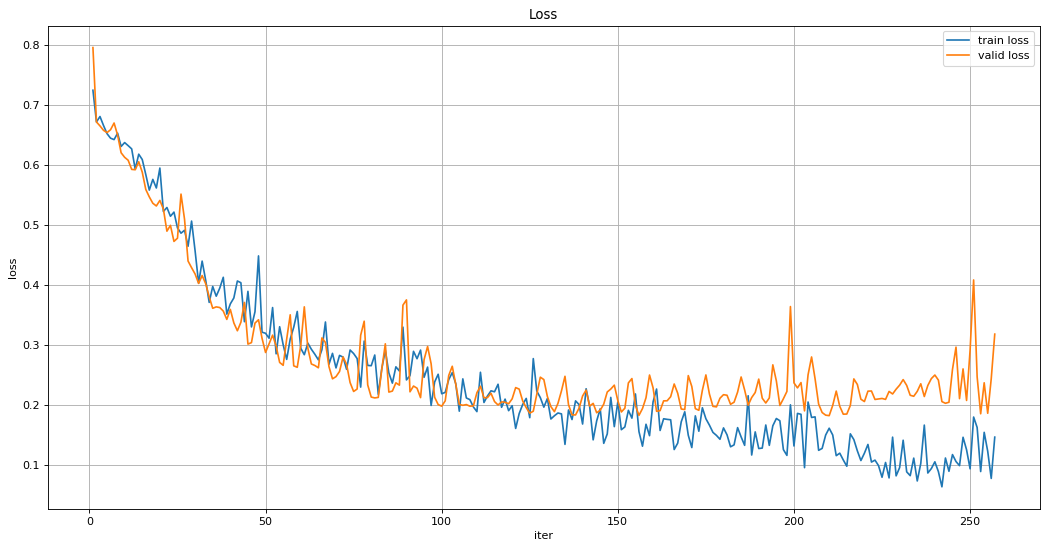

In [85]:
plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
iterations = list(range(1,iteration+1))
plt.plot(iterations, train_loss, label = "train loss")
plt.plot(iterations, valid_loss, label = "valid loss")
plt.title("Loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

## **9.2 Plot of training accuracy over iteration**

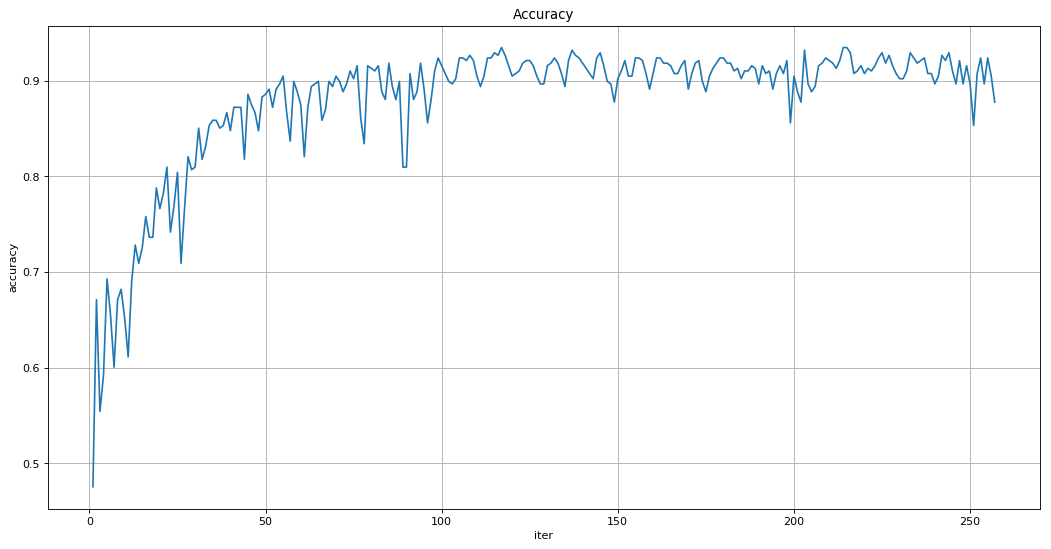

In [86]:
plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(iterations, valid_acc, label = "train loss")
plt.title("Accuracy")
plt.xlabel("iter")
plt.ylabel("accuracy")
plt.grid()
plt.show()

# **10. Advice**

Looking at the plot it is safe to say that the loss would have gone lower if we increase the number of iterations. I would advise to train the model using higher computational power to decrease iteration time and increase kernel time, an easy way to do that is by running the script on google cloud (such as dataflow) or amazon web service instances having high memory. Another advice I would give if you take the first advise is to increase the batch size to 500 to stabalize the optimization.